**ForestFire Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import  GridSearchCV,KFold,cross_val_score,train_test_split

import warnings
warnings.filterwarnings('ignore')

from keras.optimizers import Adam
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

from keras.wrappers.scikit_learn import KerasRegressor,KerasClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [2]:
from google.colab import files
uploaded=files.upload()

Saving forestfires.csv to forestfires.csv


In [3]:
data=pd.read_csv('forestfires.csv')
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
raw_data = data[['month', 'day','FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area', 'size_category' ]]
raw_data.head()  

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [5]:
print(data.shape)
print(raw_data.shape)

(517, 31)
(517, 12)


In [6]:
raw_data.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

In [7]:
raw_data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


In [ ]:
#numerical variables
numeric_features=[feature for feature in raw_data.columns if raw_data[feature].dtypes!='O']
print('Numeric_features:',numeric_features)

Numeric_features: ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']


In [ ]:
#Categorical Variables
categorical_features=[feature for feature in raw_data.columns if raw_data[feature].dtypes=='O']
print('Categorical_features:',categorical_features) 

Categorical_features: ['month', 'day', 'size_category']


In [ ]:
raw_data.corr()['area'].sort_values(ascending=False)

area    1.000000
temp    0.097844
DMC     0.072994
DC      0.049383
FFMC    0.040122
wind    0.012317
ISI     0.008258
rain   -0.007366
RH     -0.075519
Name: area, dtype: float64

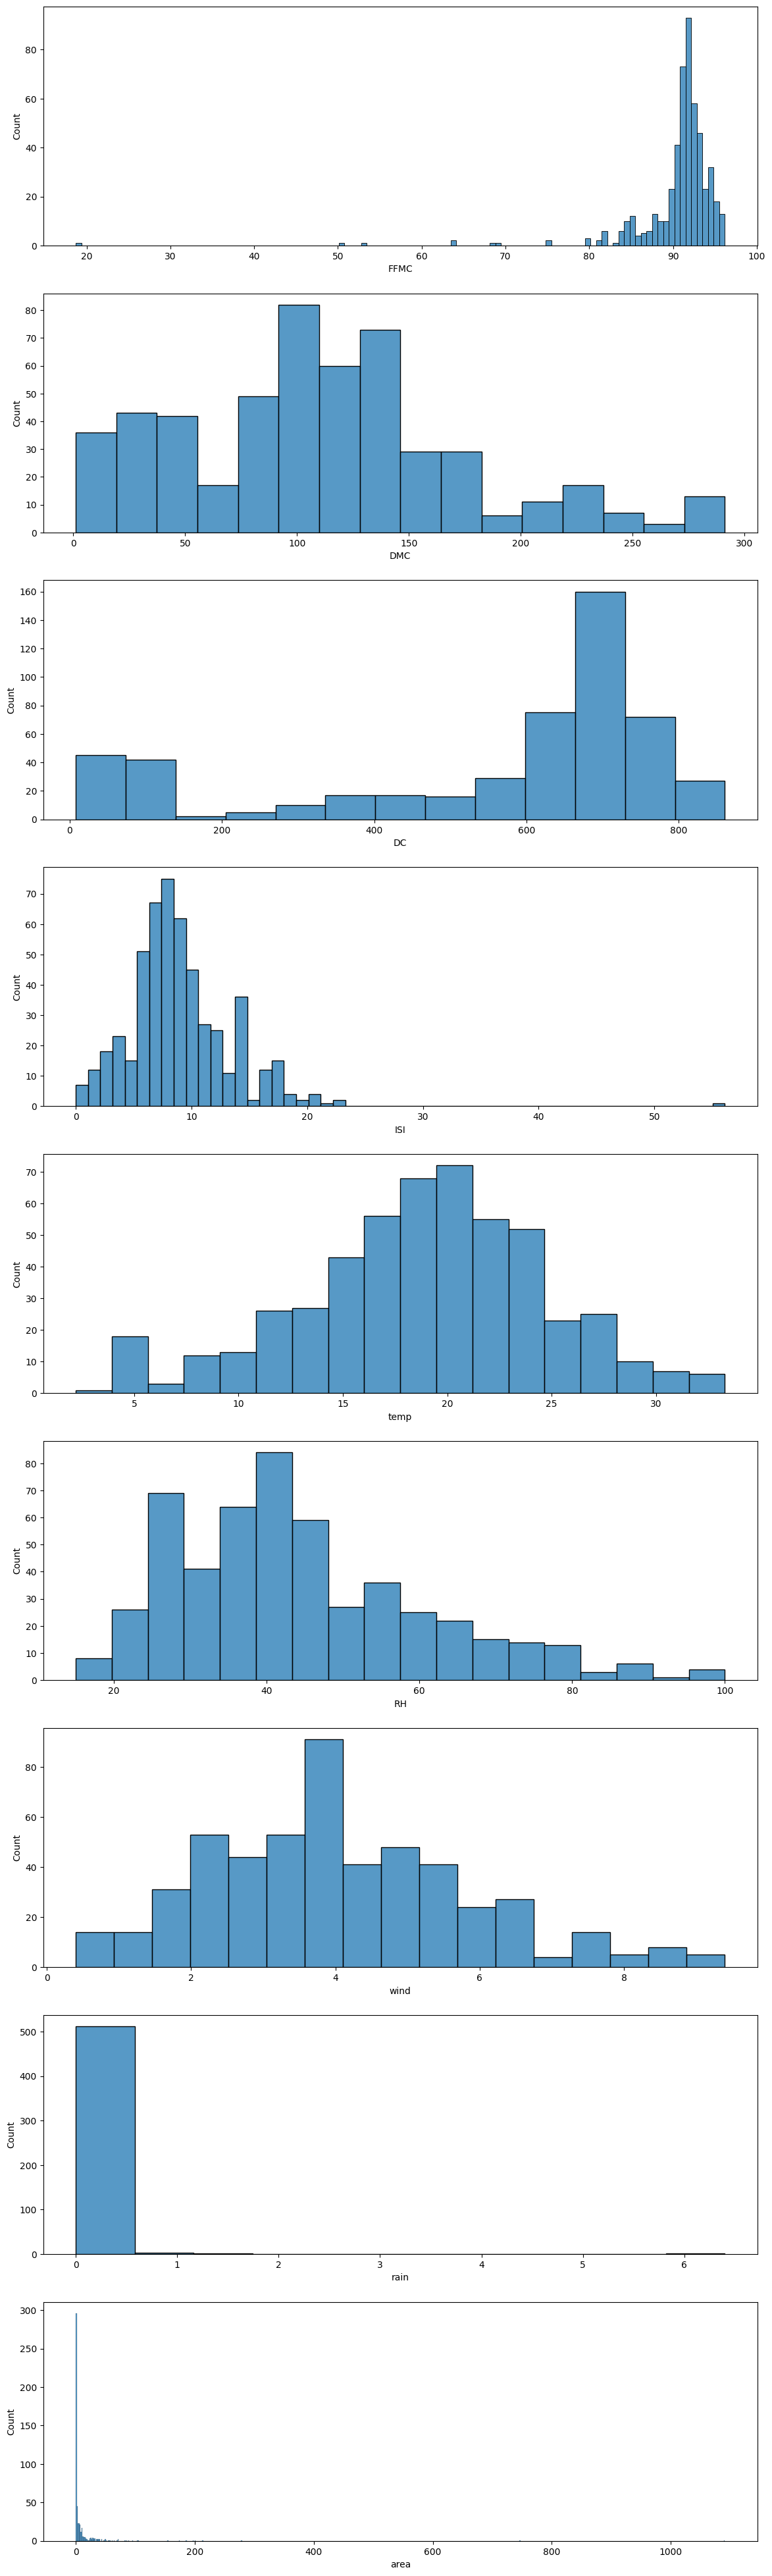

In [ ]:
fig,axes=plt.subplots(len(numeric_features),1,figsize=(14,50))

for i in range(0,len(numeric_features)):
  sns.histplot(data[numeric_features[i]],ax=axes[i])

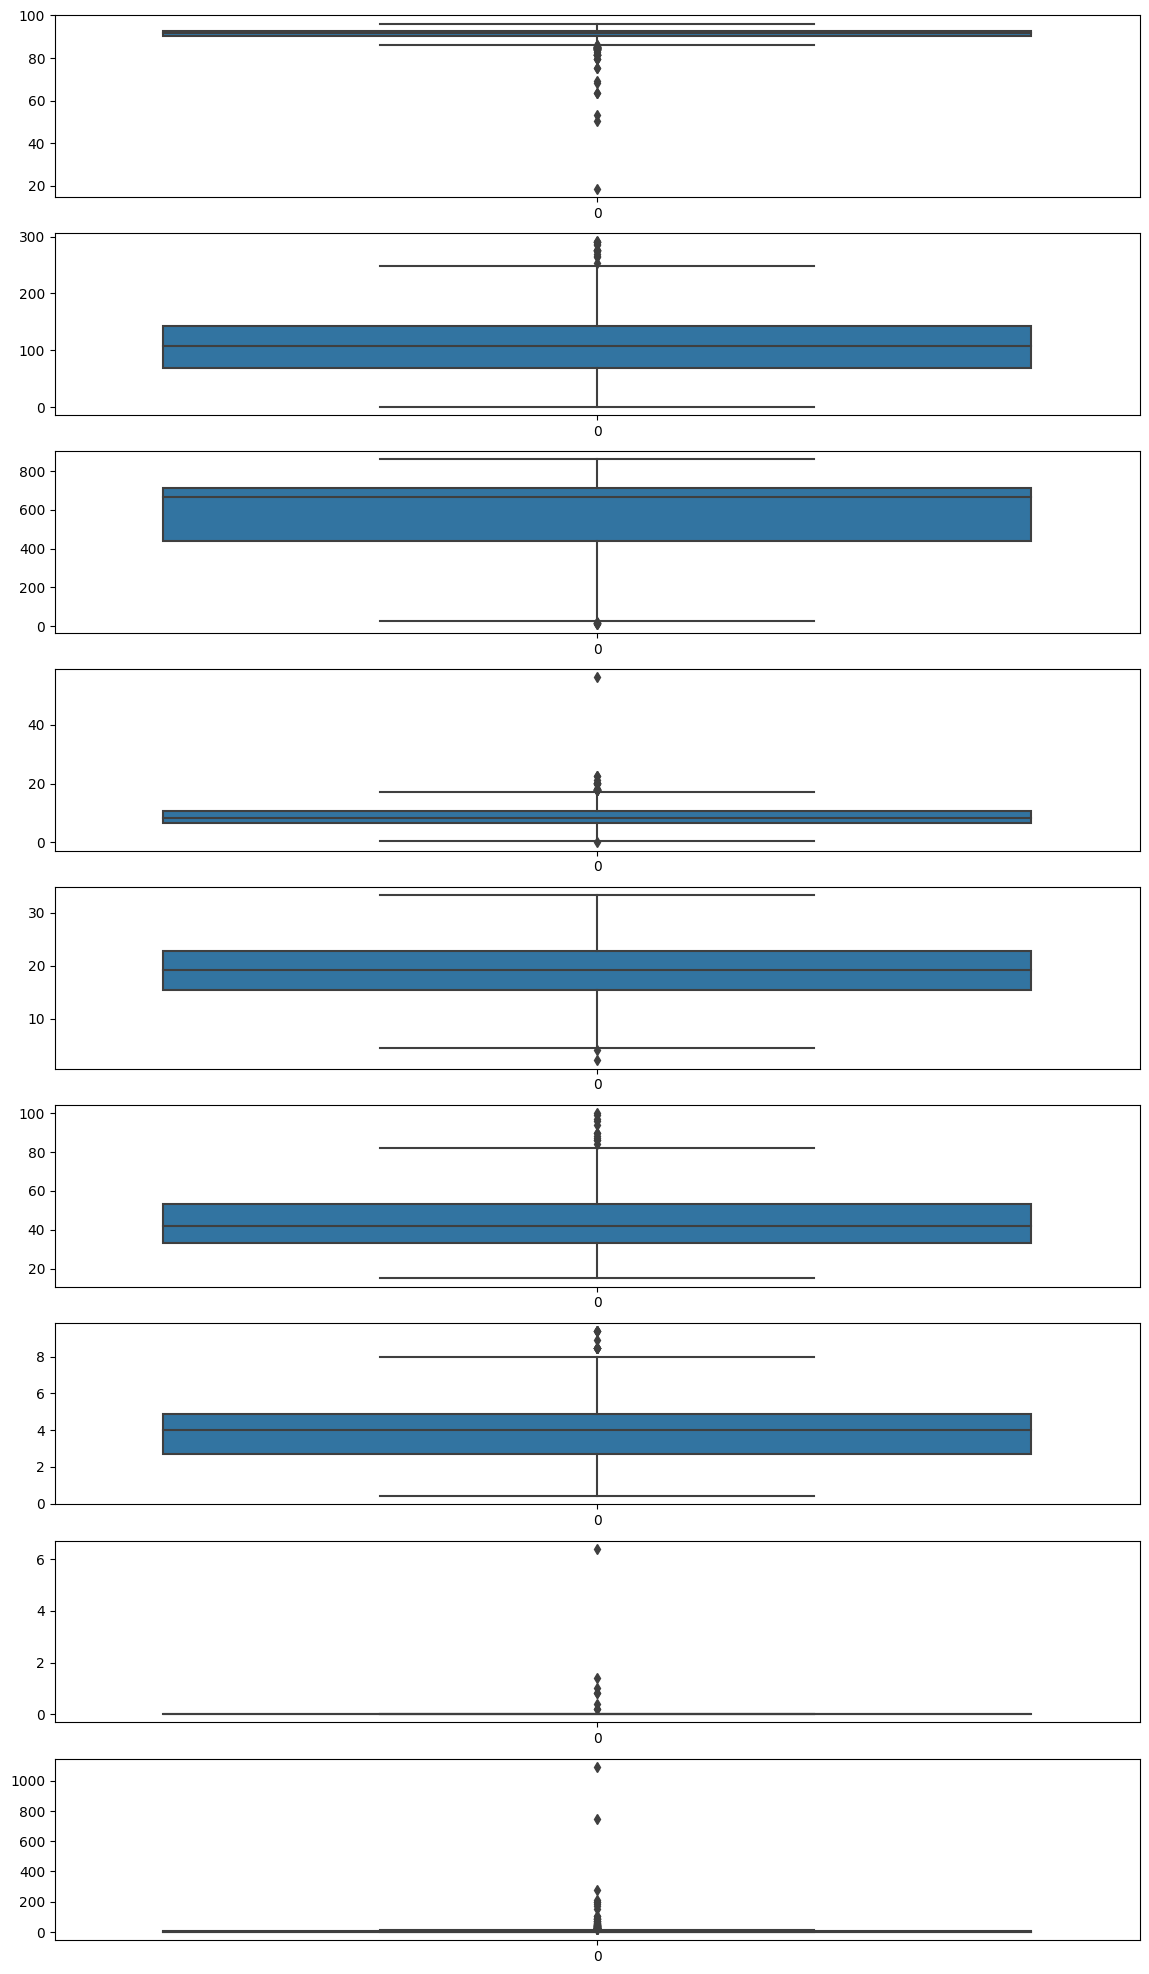

In [ ]:
fig,axes=plt.subplots(len(numeric_features),1,figsize=(14,25))

for i in range(0,len(numeric_features)):
  sns.boxplot(data[numeric_features[i]],ax=axes[i])

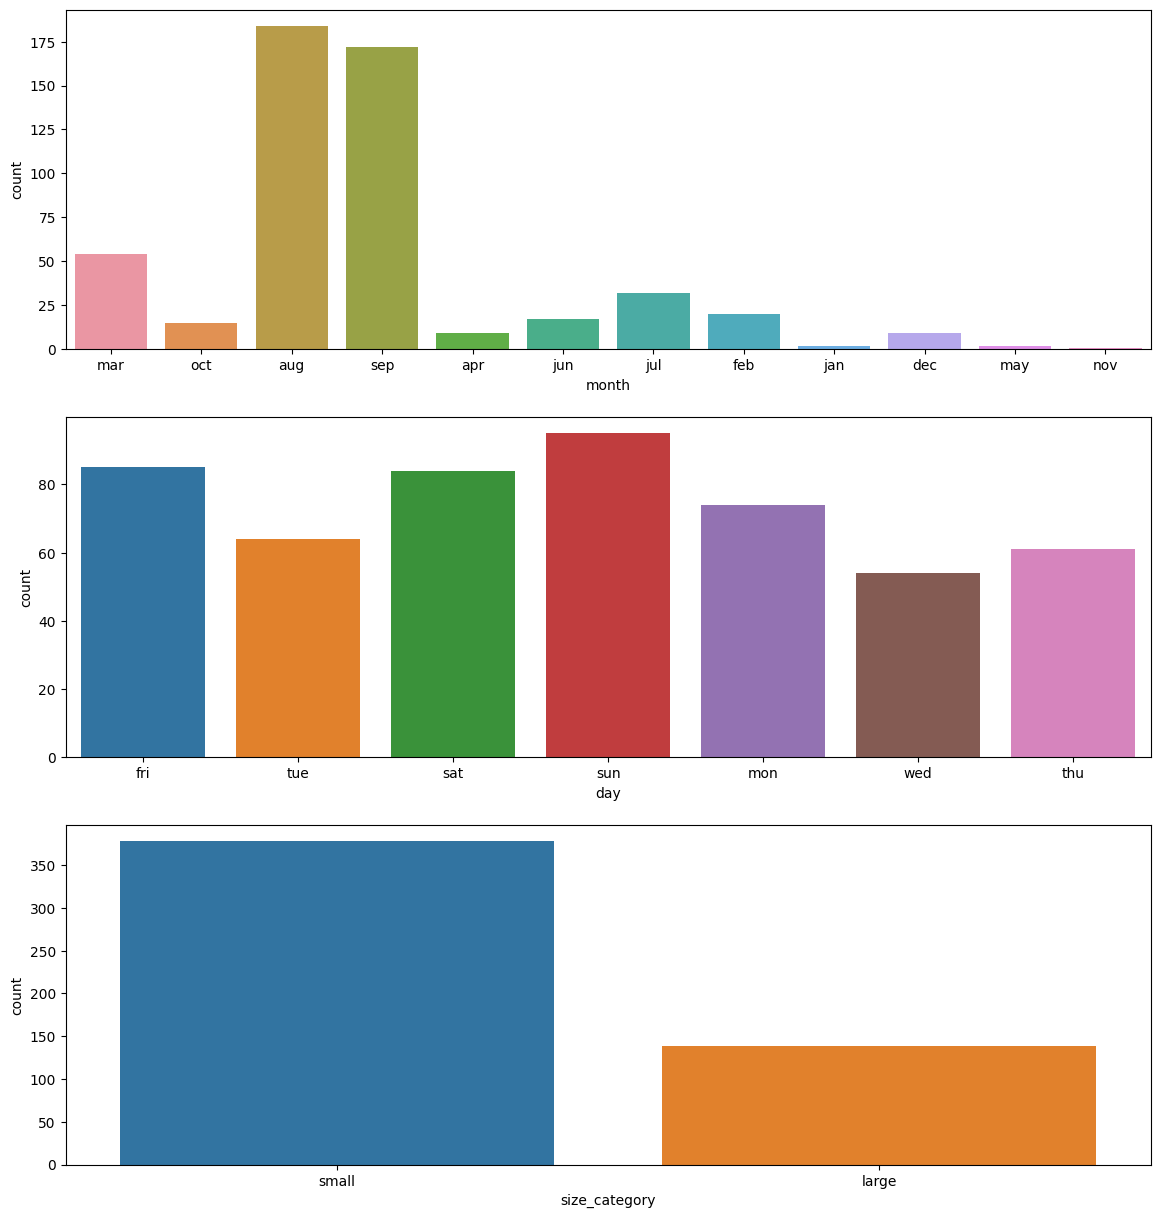

In [ ]:
fig,axes=plt.subplots(len(categorical_features),1,figsize=(14,15))

for i in range(0,len(categorical_features)):
  sns.countplot(x=categorical_features[i],data=raw_data,ax=axes[i])

<Axes: >

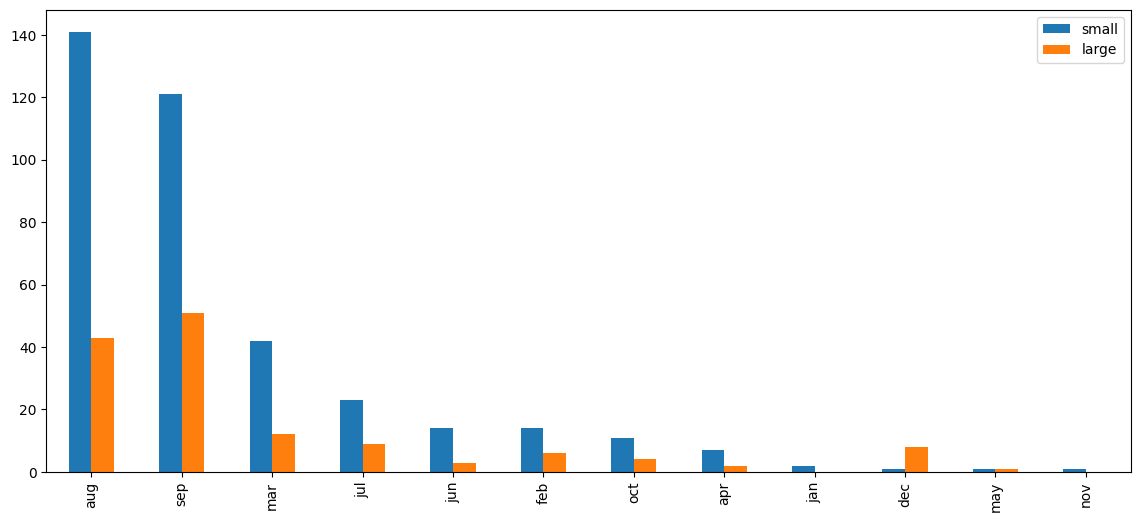

In [ ]:
#univariate analysis
#In absolute number

df=pd.DataFrame()
df['small']=raw_data[raw_data['size_category']=='small']['month'].value_counts()
df['large']=raw_data[raw_data['size_category']=='large']['month'].value_counts()

df.plot.bar(figsize=(14,6))

<Axes: >

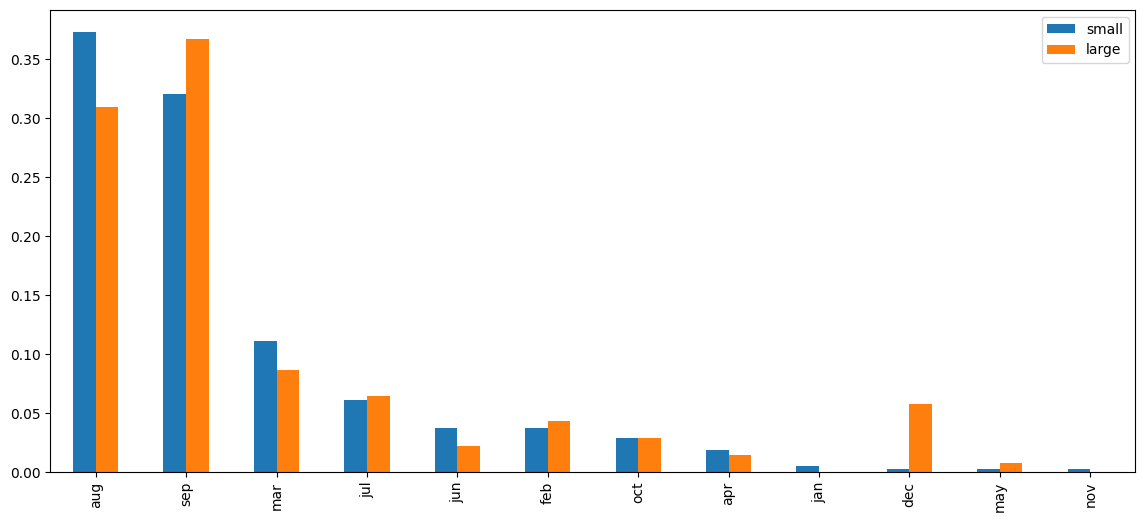

In [ ]:
#in percentage

df['small']=raw_data[raw_data['size_category']=='small']['month'].value_counts(normalize=True)
df['large']=raw_data[raw_data['size_category']=='large']['month'].value_counts(normalize=True)

df.plot.bar(figsize=(14,6))

In [ ]:
x=data.copy()
x.drop('size_category',axis=1,inplace=True)

y=data['size_category']

In [ ]:
le=LabelEncoder()
y=le.fit_transform(y)

In [ ]:
x.drop(['month','day'],axis=1,inplace=True)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=9)

In [ ]:
print('shape of x_train:',x_train.shape)
print('shape of x_test:',x_test.shape)
print('shape of y_train:',y_train.shape)
print('shape of y_test:',y_test.shape)

shape of x_train: (361, 28)
shape of x_test: (156, 28)
shape of y_train: (361,)
shape of y_test: (156,)


Models in Keras are defined as a sequence of layers.

We create a Sequential model and add layers one at a time Fully connected layers are defined using the Dense class.

You can specify the number of neurons or nodes in the layer as the first argument and the activation function using the activation argument. input_shape = no. of input features Initializations define the way to set the initial random weights of Keras layers

sigmoid on the output layer ensures your network output is between 0 and Linear on output layer ensures

When compiling, you must specify some additional properties required when training the network. Remember training a network means finding the best set of weights to map inputs to outputs in your dataset.

You must specify the loss function to use to evaluate a set of weights, the optimizer used to search through different weights for the network, and any optional metrics you want to collect and report during training.

Regression Loss Functions Mean Squared Error Loss Mean Squared Logarithmic Error Loss Mean Absolute Error Loss

Binary Classification Loss Functions Binary Cross-Entropy Hinge Loss Squared Hinge Loss

Multi-Class Classification Loss Functions Multi-Class Cross-Entropy Loss Sparse Multiclass Cross-Entropy Loss Kullback Leibler Divergence Loss

You can train or fit your model on your loaded data by calling the fit() function on the model. The training process will run for a fixed number of epochs (iterations) through the dataset that you must specify using the epochs argument. You must also set the number of dataset rows that are considered before the model weights are updated within each epoch, called the batch size, and set using the batch_size argument.

The evaluate() function will return a list with two values. The first will be the loss of the model on the dataset, and the second will be the accuracy of the model on the dataset. You are only interested in reporting the accuracy so ignore the loss value.

**Building Model for ANN**

**Tuning for Hyperparameters**

1.Batch size

2.Epochs

In [ ]:
def create_model():
  model=Sequential()
  model.add(Dense(32,input_dim=28,kernel_initializer='uniform',activation='relu'))
  model.add(Dense(64,kernel_initializer='uniform',activation='relu'))
  model.add(Dense(96,kernel_initializer='uniform',activation='relu'))
  model.add(Dense(32,kernel_initializer='uniform',activation='relu'))
  model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))


  adam=Adam(learning_rate=0.001)

  model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
  return model

In [ ]:
model=KerasClassifier(build_fn=create_model,verbose=0)
batch_size=[10,20,30]
epochs=[10,50,100,150]
param_grid=dict(batch_size=batch_size,epochs=epochs)
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=10)
grid_result=grid.fit(x,y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START batch_size=10, epochs=10...................................
[CV 1/5; 1/12] END ....batch_size=10, epochs=10;, score=1.000 total time=   3.3s
[CV 2/5; 1/12] START batch_size=10, epochs=10...................................
[CV 2/5; 1/12] END ....batch_size=10, epochs=10;, score=0.923 total time=   4.0s
[CV 3/5; 1/12] START batch_size=10, epochs=10...................................
[CV 3/5; 1/12] END ....batch_size=10, epochs=10;, score=0.913 total time=   1.9s
[CV 4/5; 1/12] START batch_size=10, epochs=10...................................
[CV 4/5; 1/12] END ....batch_size=10, epochs=10;, score=0.893 total time=   1.8s
[CV 5/5; 1/12] START batch_size=10, epochs=10...................................
[CV 5/5; 1/12] END ....batch_size=10, epochs=10;, score=0.942 total time=   2.0s
[CV 1/5; 2/12] START batch_size=10, epochs=50...................................
[CV 1/5; 2/12] END ....batch_size=10, epochs=50;

In [ ]:
#Summarize the result
print('Best:{},using{}'.format(grid_result.best_score_,grid_result.best_params_))
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best:0.9825616121292114,using{'batch_size': 30, 'epochs': 50}
0.9341299414634705,0.036487325142660634 with: {'batch_size': 10, 'epochs': 10}
0.9690253853797912,0.022405434174522593 with: {'batch_size': 10, 'epochs': 50}
0.9632188200950622,0.023199140428662147 with: {'batch_size': 10, 'epochs': 100}
0.9805825114250183,0.02213933701713096 with: {'batch_size': 10, 'epochs': 150}
0.9400298714637756,0.04330406628103036 with: {'batch_size': 20, 'epochs': 10}
0.9806758761405945,0.018273791007605907 with: {'batch_size': 20, 'epochs': 50}
0.9747572660446167,0.02718447617122212 with: {'batch_size': 20, 'epochs': 100}
0.978659451007843,0.018837525480133697 with: {'batch_size': 20, 'epochs': 150}
0.7473861038684845,0.2548890336057516 with: {'batch_size': 30, 'epochs': 10}
0.9825616121292114,0.009505252479063746 with: {'batch_size': 30, 'epochs': 50}
0.9787341356277466,0.019674327023927907 with: {'batch_size': 30, 'epochs': 100}
0.978659451007843,0.018837525480133697 with: {'batch_size': 30, 'epoch



*   Learning Rate
*   Dropout Rate



In [ ]:
from keras.layers import Dropout

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model=Sequential()
    model.add(Dense(32,input_dim=28,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(96,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
    
    adam = Adam(learning_rate = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model



In [ ]:
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 30,epochs = 50)
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]
param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=1.000 total time=   3.6s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.962 total time=   3.7s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.990 total time=   3.9s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.942 total time=   2.7s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.990 total time=   2.7s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 

In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9864451050758362, using {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.9767736911773681,0.021743290685827733 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.9864451050758362,0.011632043349526788 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.9709858179092408,0.024429196396768833 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.9728342056274414,0.02635155439934457 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.9766990184783936,0.025017672694543486 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.8641150116920471,0.17467429567169226 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.7325242757797241,0.15178268966445949 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}




*   Activation Function
*   Kernel Initializer



In [ ]:
def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(32,input_dim=28,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(0.0))
    model.add(Dense(64,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(0.0))
    model.add(Dense(96,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(0.0))
    model.add(Dense(32,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(0.0))
    model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
    
    adam = Adam(lr = 0.01)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [ ]:
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 150)
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']
param_grids = dict(activation_function = activation_function,init = init)
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x,y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=1.000 total time=  21.9s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.788 total time=  21.6s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.864 total time=  15.5s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.767 total time=  21.5s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.961 total time=  17.4s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...

In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9418222546577454, using {'activation_function': 'relu', 'init': 'uniform'}
0.8761389255523682,0.09199698422680408 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.7868932008743286,0.158228600951026 with: {'activation_function': 'softmax', 'init': 'normal'}
0.8757281541824341,0.17895708433424415 with: {'activation_function': 'softmax', 'init': 'zero'}
0.9418222546577454,0.07395929393366735 with: {'activation_function': 'relu', 'init': 'uniform'}
0.8971247196197509,0.12307761810182147 with: {'activation_function': 'relu', 'init': 'normal'}
0.9262322664260865,0.11482009113134443 with: {'activation_function': 'relu', 'init': 'zero'}
0.9106982827186585,0.08844630961087734 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.8818894743919372,0.13017069325055028 with: {'activation_function': 'tanh', 'init': 'normal'}
0.9166542291641235,0.11065959096671445 with: {'activation_function': 'tanh', 'init': 'zero'}
0.8021097898483276,0.13475078555260844 with: {'activation




*   Number of neurons in activation layer



In [ ]:
def create_model(neuron1,neuron2,neuron3,neuron4):
    model = Sequential()
    model.add(Dense(32,input_dim=28,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(0.0))
    model.add(Dense(64,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(0.0))
    model.add(Dense(96,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(0.0))
    model.add(Dense(32,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(0.0))
    model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
    
    adam = Adam(lr = 0.01)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [ ]:
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 30,epochs = 50)
neuron1 = [16,24,32]
neuron2 = [16,24,32]
neuron3 = [16,24,32]
neuron4 = [16,24,32]
param_grids = dict(neuron1 = neuron1,neuron2 = neuron2,neuron3=neuron3,neuron4=neuron4)
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x,y)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5; 1/81] START neuron1=16, neuron2=16, neuron3=16, neuron4=16.............
[CV 1/5; 1/81] END neuron1=16, neuron2=16, neuron3=16, neuron4=16;, score=1.000 total time=   3.8s
[CV 2/5; 1/81] START neuron1=16, neuron2=16, neuron3=16, neuron4=16.............
[CV 2/5; 1/81] END neuron1=16, neuron2=16, neuron3=16, neuron4=16;, score=0.952 total time=   3.8s
[CV 3/5; 1/81] START neuron1=16, neuron2=16, neuron3=16, neuron4=16.............
[CV 3/5; 1/81] END neuron1=16, neuron2=16, neuron3=16, neuron4=16;, score=0.981 total time=   6.3s
[CV 4/5; 1/81] START neuron1=16, neuron2=16, neuron3=16, neuron4=16.............
[CV 4/5; 1/81] END neuron1=16, neuron2=16, neuron3=16, neuron4=16;, score=0.951 total time=   3.8s
[CV 5/5; 1/81] START neuron1=16, neuron2=16, neuron3=16, neuron4=16.............
[CV 5/5; 1/81] END neuron1=16, neuron2=16, neuron3=16, neuron4=16;, score=0.971 total time=   3.2s
[CV 1/5; 2/81] START neuron1=16, neuro

In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.984466016292572, using {'neuron1': 32, 'neuron2': 24, 'neuron3': 16, 'neuron4': 32}
0.9709671378135681,0.018323321573893513 with: {'neuron1': 16, 'neuron2': 16, 'neuron3': 16, 'neuron4': 16}
0.9747759580612183,0.02000605735065301 with: {'neuron1': 16, 'neuron2': 16, 'neuron3': 16, 'neuron4': 24}
0.8971994042396545,0.0868086525330898 with: {'neuron1': 16, 'neuron2': 16, 'neuron3': 16, 'neuron4': 32}
0.938125467300415,0.054777981503193324 with: {'neuron1': 16, 'neuron2': 16, 'neuron3': 24, 'neuron4': 16}
0.92630695104599,0.053785321137959696 with: {'neuron1': 16, 'neuron2': 16, 'neuron3': 24, 'neuron4': 24}
0.9456497430801392,0.051609687761693 with: {'neuron1': 16, 'neuron2': 16, 'neuron3': 24, 'neuron4': 32}
0.9728342056274414,0.03549594695387067 with: {'neuron1': 16, 'neuron2': 16, 'neuron3': 32, 'neuron4': 16}
0.9631067991256714,0.06028804558798564 with: {'neuron1': 16, 'neuron2': 16, 'neuron3': 32, 'neuron4': 24}
0.9592419862747192,0.04928781096628488 with: {'neuron1': 16, '

**Building Model with Optimum HyperParameters**

In [ ]:
def create_model():
    model = Sequential()
    model.add(Dense(32,input_dim=28,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(0.0))
    model.add(Dense(24,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(0.0))
    model.add(Dense(16,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(0.0))
    model.add(Dense(32,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(0.0))
    model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
    
    adam = Adam(lr = 0.01) 
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 30,epochs = 50)
model.fit(x,y)

In [ ]:
pred=model.predict(x_test)

5/5 [==============================] - 0s 2ms/step


In [ ]:
pred[:5]

array([[1],
       [0],
       [1],
       [1],
       [0]])

In [ ]:
predicted=[]
for i in range(0,len(pred)):
  if pred[i]<0.5:
    predicted.append(0)
  else:
    predicted.append(1)

In [ ]:
print('actual y is:',y_test[:5],'\n','predicted y is:',predicted[:5])

actual y is: [1 0 1 1 0] 
 predicted y is: [1, 0, 1, 1, 0]


In [ ]:
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_test,predicted)
print('Accuracy of model is:',accuracy)

Accuracy of model is: 0.9743589743589743


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        45
           1       0.97      1.00      0.98       111

    accuracy                           0.97       156
   macro avg       0.98      0.96      0.97       156
weighted avg       0.98      0.97      0.97       156



<Axes: >

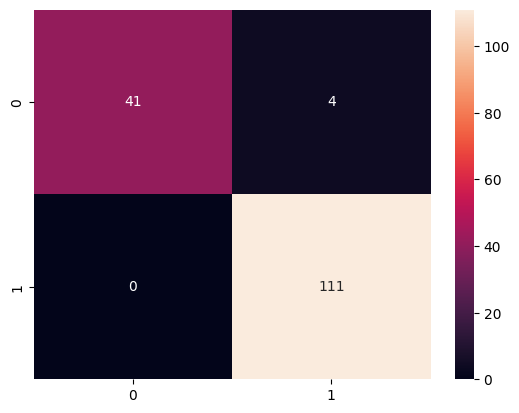

In [ ]:
sns.heatmap(confusion_matrix(y_test, predicted), annot=True, fmt='d')